# Performance Metrics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [3]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [4]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [6]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [8]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Confusion matrices

#### Binary (two-class) confusion matrix

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]
0.9044444444444445


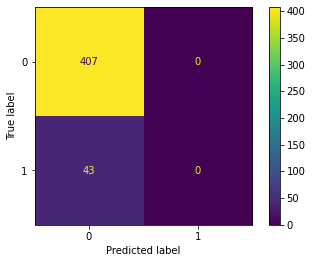

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

print(dummy_majority.score(X_test, y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion,
                              display_labels=dummy_majority.classes_)
disp.plot()
plt.show()

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]
0.9777777777777777


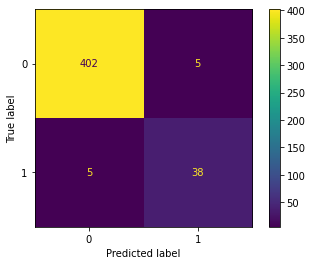

In [10]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

print(svm.score(X_test, y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion,
                              display_labels=svm.classes_)
disp.plot()
plt.show()

Logistic regression classifier (default settings)
 [[403   4]
 [  7  36]]
0.9755555555555555


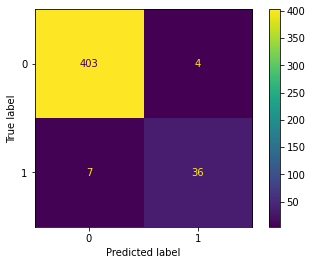

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

print(lr.score(X_test, y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]
0.9466666666666667


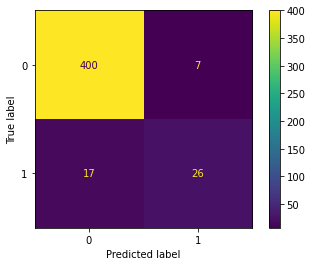

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

print(dt.score(X_test, y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion,
                              display_labels=dt.classes_)
disp.plot()
plt.show()

### Evaluation metrics for binary classification

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [14]:
# Combined report with all above metrics
from sklearn.metrics import classification_report
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Decision tree
               precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [15]:
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.99       407
           1       0.90      0.84      0.87        43

    accuracy                           0.98       450
   macro avg       0.94      0.91      0.93       450
weighted avg       0.98      0.98      0.98       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450



### Decision functions

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -34.6187737788592),
 (0, -18.004368921666),
 (0, -20.987909912522404),
 (0, -36.801574927707776),
 (0, -39.323368414548206),
 (0, -18.85872768037691),
 (1, 6.001673405414056),
 (0, -32.71050470291895),
 (0, -35.48101317091054),
 (0, -37.34432089037329),
 (0, -25.027222265918127),
 (0, -21.400182743511806),
 (0, -36.499615809263645),
 (0, -15.916760585894878),
 (0, -12.836049317471225),
 (0, -13.722179666690725),
 (1, 14.766259811601795),
 (0, -39.39408672900659),
 (0, -26.098814905855463),
 (0, -28.431392111991123)]

In [17]:
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 9.231187613096824e-16),
 (0, 1.5163586065794657e-08),
 (0, 7.674790653241043e-10),
 (0, 1.0405886474519243e-16),
 (0, 8.35753276173583e-18),
 (0, 6.452954901191433e-09),
 (1, 0.9975315008788772),
 (0, 6.223121887389768e-15),
 (0, 3.8975506485146094e-16),
 (0, 6.047383447797422e-17),
 (0, 1.3514982028690668e-11),
 (0, 5.081813499218546e-10),
 (0, 1.4074023195248673e-16),
 (0, 1.2230343497275934e-07),
 (0, 2.6630140357610874e-06),
 (0, 1.0978237306477104e-06),
 (1, 0.9999996135487844),
 (0, 7.786916432633427e-18),
 (0, 4.628376737944126e-12),
 (0, 4.4916229575909553e-13)]

### Precision-recall curves

In [18]:
from sklearn.metrics import precision_recall_curve
!pip install scikit_plot

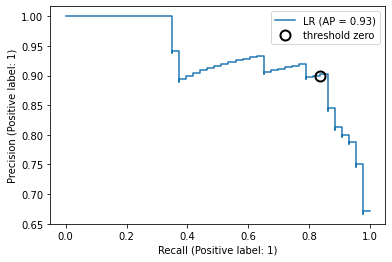

In [19]:
# Import scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,PrecisionRecallDisplay

pr_lr = PrecisionRecallDisplay.from_estimator(lr, X_test, y_test, name='LR')

p_lr, r_lr, _, _ = precision_recall_fscore_support(y_test, lr.predict(X_test), average='binary')
plt.plot(r_lr, p_lr, 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend()

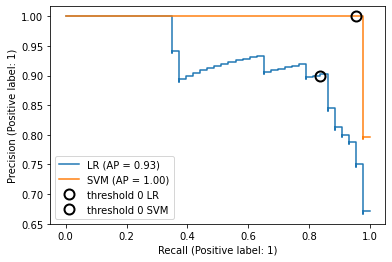

In [20]:
svm = SVC(kernel='rbf', C=1, probability = True)
svm.fit(X_train, y_train)

pr_lr.plot(name='LR')

pr_svm = PrecisionRecallDisplay.from_estimator(svm, X_test, y_test, name='SVM', ax=plt.gca())

p_svm, r_svm, _, _ = precision_recall_fscore_support(y_test, svm.predict(X_test), average='binary')

plt.plot(r_lr, p_lr, 'o', markersize=10, label="threshold 0 LR", fillstyle="none", c='k', mew=2)
plt.plot(r_svm, p_svm, 'o', markersize=10, label="threshold 0 SVM", fillstyle="none", c='k', mew=2)

plt.legend()

# F1 vs average precision

In [21]:
from sklearn.metrics import f1_score

print("f1_score of LR: {:.3f}".format(
      f1_score(y_test, lr.predict(X_test))))

print("f1_score of SVM: {:.3f}".format(f1_score(y_test, svm.predict(X_test))))

f1_score of LR: 0.867
f1_score of SVM: 0.976


In [22]:
from sklearn.metrics import average_precision_score
ap_lr = average_precision_score(y_test, lr.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svm.decision_function(X_test))
print("Average precision of LR: {:.3f}".format(ap_lr))
print("Average precision of SVM: {:.3f}".format(ap_svc))

Average precision of LR: 0.925
Average precision of SVM: 0.995


# ROC CURVE

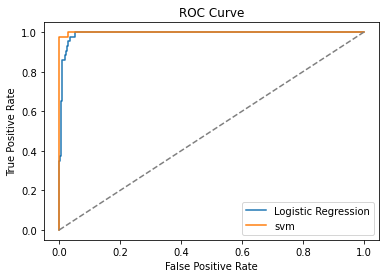

In [23]:
# ROC Curve 
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
svm_fpr, svm_tpr, _ = metrics.roc_curve(y_test, svm.decision_function(X_test))
#RocCurveDisplay(fpr=lr_fpr, tpr=lr_tpr)
#RocCurveDisplay(fpr=svm_fpr, tpr=svm_tpr)

plt.plot(lr_fpr, lr_tpr,label ='Logistic Regression')
plt.plot(svm_fpr, svm_tpr,label='svm' )
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score

y_score_svm = svm.predict_proba(X_test)
roc_auc_score(y_test, y_score_svm[:,1])

0.9993714644877436

In [25]:
y_score_lr = lr.predict_proba(X_test)
roc_auc_score(y_test, y_proba_lr[:,1])

0.9927432718130392

# Multi-class

In [26]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
 # data is between 0 and 16
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, random_state=0)
lr = LogisticRegression(max_iter = 100000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.962
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  1  1]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  2  0  0 46  0  0]
 [ 0  3  1  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      1.00      0.99        44
           3       1.00      0.96      0.98        45
           4       0.95      0.97      0.96        38
           5       0.96      0.96      0.96        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.96      0.90      0.92        48
           9       0.92      0.98      0.95        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [28]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, pred, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, pred, average = 'macro')))

Micro-averaged precision = 0.96 (treat instances equally)
Macro-averaged precision = 0.96 (treat classes equally)


In [29]:
print('Micro-averaged recall = {:.2f} (treat instances equally)'
      .format(recall_score(y_test, pred, average = 'micro')))
print('Macro-averaged recall = {:.2f} (treat classes equally)'
      .format(recall_score(y_test, pred, average = 'macro')))

Micro-averaged recall = 0.96 (treat instances equally)
Macro-averaged recall = 0.96 (treat classes equally)


In [30]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test, pred, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test, pred, average = 'macro')))

Micro-averaged f1 = 0.96 (treat instances equally)
Macro-averaged f1 = 0.96 (treat classes equally)


### Model selection using evaluation metrics

#### Cross-validation example

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.919 0.986 0.972 0.975 0.969]
Cross-validation (AUC) [0.964 0.998 0.994 0.997 0.987]
Cross-validation (recall) [0.811 0.892 0.833 0.833 0.833]


#### Grid search example

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)
print('Test set AUC (accuracy): ', roc_auc_score(y_test, y_decision_fn_scores_acc))

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)
print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Test set AUC (accuracy):  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0
Test set AUC:  0.99982858122393
